Germany Aachen
[78, 3, 74, 63, 54, 86, 78, 51, 49, 55, 55, 5, 56, 54, 72]


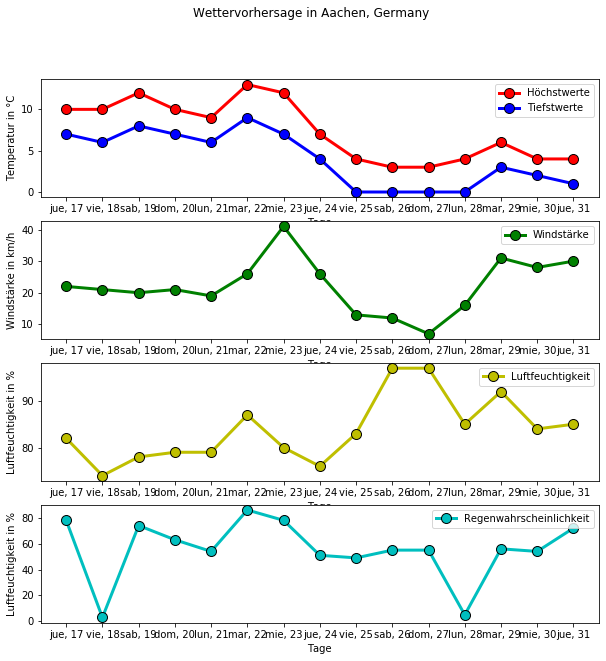

Germany Aachen


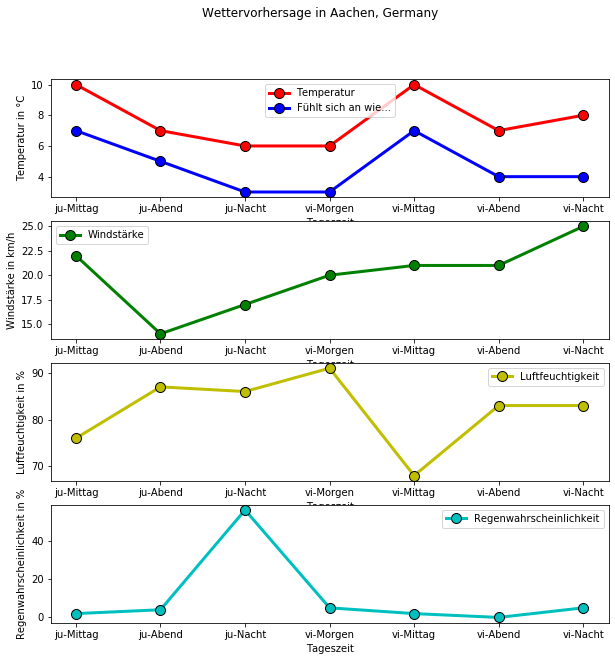

Germany Aachen


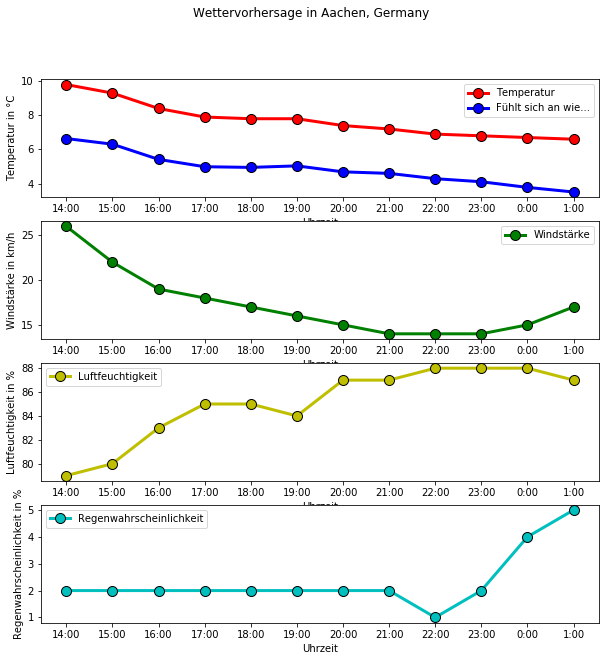

Germany Aachen
[78, 3, 74, 63, 54, 86, 78, 51, 49, 55, 55, 5, 56, 54, 72]


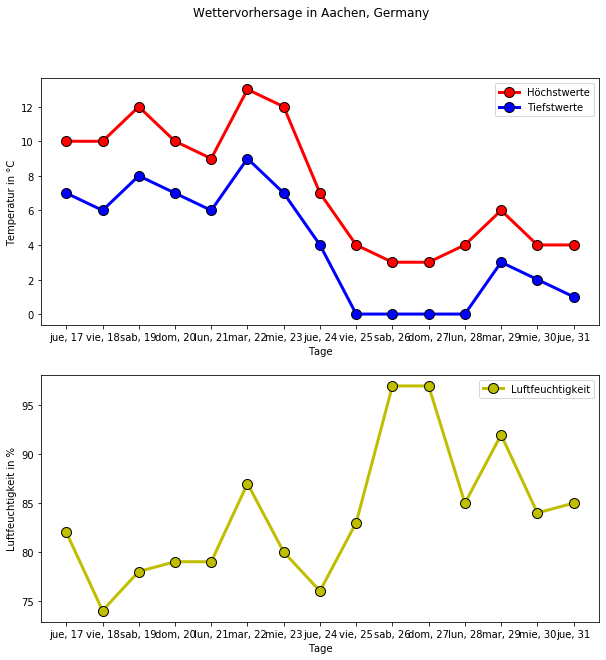

Germany Aachen
[78, 3, 74, 63, 54, 86, 78, 51, 49, 55, 55, 5, 56, 54, 72]


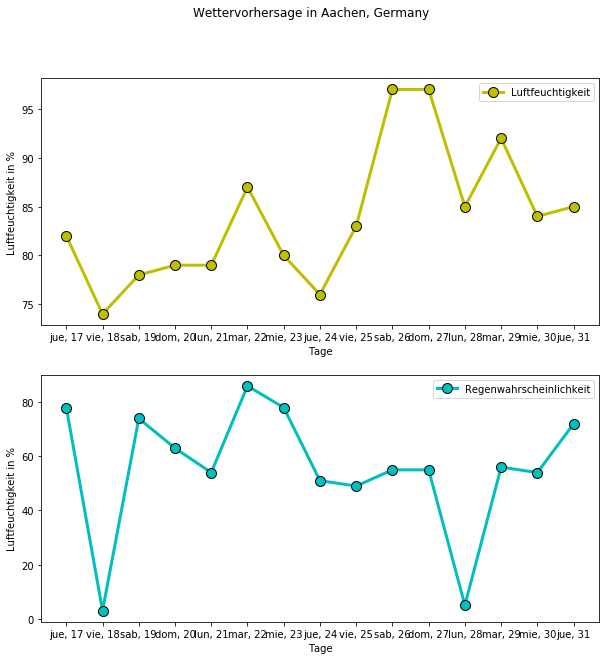

Germany Aachen
[78, 3, 74, 63, 54, 86, 78, 51, 49, 55, 55, 5, 56, 54, 72]


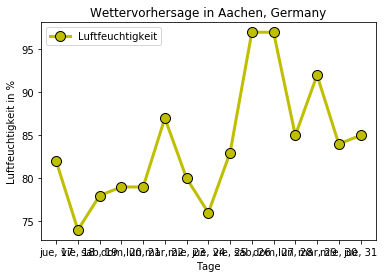

Germany Aachen


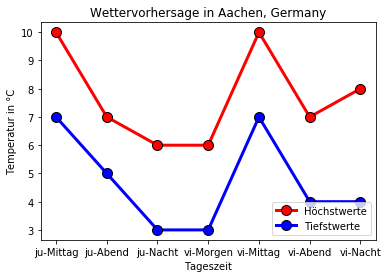

In [1]:
import sys
import matplotlib.pyplot as plt
import PyQt5.QtWidgets as qtw
from PyQt5.QtGui import QStandardItemModel, QStandardItem, QFont
from PyQt5.QtGui import QIcon
from PyQt5 import QtGui, QtCore
from bs4 import BeautifulSoup as bs
import requests
import re
import json
import pandas as pd
import qdarkstyle
from itertools import cycle

# import the json data
with open("country_city_dict.json", "r") as f:
    weather_data = json.load(f)


class MainWindow(qtw.QWidget):
    # widgets are attached here
    def __init__(self):
        super().__init__()
        self.setWindowTitle("Wettervorhersage")
        self.setWindowIcon(QIcon("weather_icon.png"))
        mainLayout = qtw.QGridLayout()

        self.model = QStandardItemModel()
        self.setLayout(mainLayout)

        self.show()

        # Widgets -----------------------------------------------------------------------------------------------------#

        # Labels
        self.lb_1 = qtw.QLabel("Attribute:")
        self.lb_1.setStyleSheet("border-bottom-width: 1px; border-bottom-style: solid; border-radius: 0px;")
        self.lb_2 = qtw.QLabel("Enter Country:")
        self.lb_3 = qtw.QLabel("Enter City:")

        # Comboboxes
        self.cbo_1 = qtw.QComboBox()
        self.cbo_1.setFixedSize(325, 50)
        self.cbo_1.setFont(QFont("", 12))
        self.cbo_1.setModel(self.model)

        self.cbo_2 = qtw.QComboBox(self)
        self.cbo_2.setFixedSize(325, 50)
        self.cbo_2.setFont(QFont("", 12))
        self.cbo_2.setModel(self.model)

        # check boxes
        self.chx_1 = qtw.QCheckBox("Temperatur")
        self.chx_2 = qtw.QCheckBox("Windstärke")
        self.chx_3 = qtw.QCheckBox("Luftfeuchtigkeit")
        self.chx_4 = qtw.QCheckBox("Regenwahrscheinlichkeit")
        

        # set the to true
        self.chx_1.setChecked(True)
        self.chx_2.setChecked(True)
        self.chx_3.setChecked(True)
        self.chx_4.setChecked(True)

        # add Data
        for k, v in weather_data.items():
            country = QStandardItem(k)
            self.model.appendRow(country)
            for value in v:
                city = QStandardItem(value)
                country.appendRow(city)

        self.cbo_1.currentIndexChanged.connect(self.update_combo)
        self.update_combo(0)
        self.cbo_1.setCurrentIndex(74)

        # Button
        self.btn_1 = qtw.QPushButton("Wettervorhersage 14 Tage", objectName="WetterButton")
        self.btn_1.clicked.connect(self.weather_forecast)
        self.btn_1.setStyleSheet("background-color: green; min-width: 20em")
        self.btn_2 = qtw.QPushButton("Wettervorhersage 48 Stunden", clicked=self.forecast_two_days)
        self.btn_2.setStyleSheet("background-color: green; min-width: 20em")
        self.btn_3 = qtw.QPushButton("Stündliche Wettervorhersage", clicked=self.hourly_forecast)
        self.btn_3.setStyleSheet("background-color: green; min-width: 20em")

        # Styles
        self.lb_1.setFont(QtGui.QFont("Arial", 12))
        self.lb_2.setFont(QtGui.QFont("Arial", 10))
        self.lb_3.setFont(QtGui.QFont("Arial", 10))
        self.chx_1.setFont(QtGui.QFont("Arial", 11))
        self.chx_2.setFont(QtGui.QFont("Arial", 11))
        self.chx_3.setFont(QtGui.QFont("Arial", 11))
        self.chx_4.setFont(QtGui.QFont("Arial", 11))
        self.btn_1.setFont(QtGui.QFont("Arial", 13, QFont.Bold))
        self.btn_2.setFont(QtGui.QFont("Arial", 13, QFont.Bold))
        self.btn_3.setFont(QtGui.QFont("Arial", 13, QFont.Bold))
        self.cbo_1.setFont(QtGui.QFont("Arial", 16))
        self.cbo_2.setFont(QtGui.QFont("Arial", 16))

        # Layouts------------------------------------------------------------------------------------------------------#

        # Labels
        mainLayout.layout().addWidget(self.lb_1, 2, 0, 1, 3)
        mainLayout.layout().addWidget(self.lb_2, 0, 0)
        mainLayout.layout().addWidget(self.lb_3, 0, 1)

        # Comboboxes
        mainLayout.layout().addWidget(self.cbo_1, 1, 0)
        mainLayout.layout().addWidget(self.cbo_2, 1, 1)

        # Button
        mainLayout.layout().addWidget(self.btn_1, 6, 0)
        mainLayout.layout().addWidget(self.btn_2, 6, 1)
        mainLayout.layout().addWidget(self.btn_3, 6, 2)

        # Checkboxes
        mainLayout.layout().addWidget(self.chx_1, 3, 0)
        mainLayout.layout().addWidget(self.chx_2, 3, 1)
        mainLayout.layout().addWidget(self.chx_3, 3, 2)
        mainLayout.layout().addWidget(self.chx_4, 4, 0)
    
    def get_random_number_of_colors(self, number):
        if number == 1:
            return (random.random(), random.random(), random.random())
        color_list = []
        n = 0
        while n < number:
            random_color = (random.random(), random.random(), random.random())
            color_list.append(random_color)
            n += 1
        return color_list

    def update_combo(self, index):
        indx = self.model.index(index, 0, self.cbo_1.rootModelIndex())
        self.cbo_2.setRootModelIndex(indx)
        self.cbo_2.setCurrentIndex(0)

    def forecast_two_days(self):
        wetter_url = "https://www.timeanddate.com/weather/{}/{}"
        headers = {
            "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.198 Safari/537.36"}
        land = self.cbo_1.currentText()
        stadt = self.cbo_2.currentText()
        rel_land = land.lower()
        rel_stadt = stadt.lower()
        sonderzeichen = [" ", "á", "í", "é", "ß", "ō", "ā", "ñ", "ī", "è", "ó", "ł", "ń", "ą", "ę", "ẕ", "ö", "ä", "ü",
                         "ø", "å"]
        sonderzeichen_replacement = ["-", "a", "i", "e", "ss", "o", "a", "n", "i", "e", "o", "l", "n", "a", "e", "z",
                                     "o", "a", "u", "o", "a"
                                     ]

        for index, letter in enumerate(sonderzeichen):
            if letter in rel_stadt:
                rel_stadt = rel_stadt.replace(letter, sonderzeichen_replacement[index])

        print(land, stadt)
        try:
            r = requests.get(wetter_url.format(rel_land, rel_stadt), headers=headers)

            soup = bs(r.content, features="lxml")

            script_data = soup.find("table", {"class", "zebra tb-wt tc sep"}).find_all("tr")

            days = [s.text for s in script_data[0]][1:]
            time_of_day = [s.text for s in script_data[1]][1:]
            temp = [s.text[:-3] for s in script_data[3]][1:]
            himmel = [s.text for s in script_data[4]][1:]
            feels_like = [s.text[:-3] for s in script_data[5]][1:]
            wind = [s.text[:-5] for s in script_data[6]][1:]
            wind_dir = [s.text[:-1] for s in script_data[7]][1:]
            humidity = [s.text[:-1] for s in script_data[8]][1:]
            rain_prob = [s.text[:-1] for s in script_data[11]][1:]
            temp = [int(i) for i in temp]
            feels_like = [int(i) for i in feels_like]
            wind = [int(i) for i in wind]
            humidity = [int(i) for i in humidity]
            rain_prob = [int(i) for i in rain_prob]
            
            dates = []
            for date in time_of_day:
                date = date.replace("Morning", "Morgen")
                date = date.replace("Afternoon", "Mittag")
                date = date.replace("Evening", "Abend")
                date = date.replace("Night", "Nacht")
                dates.append(date)

            correct_day = []
            i = 0
            for date, day in zip(dates, cycle(days)):
                if date != "Nacht":
                    correct_day.append(days[i])
                else:
                    correct_day.append(days[i])
                    i += 1

            day_time = []
            for day, time in zip(correct_day, dates):
                day_time.append(str(day[:2] + "-" + time))

            var_dict = {"Temperatur": [temp, feels_like],
                        "Windstärke": wind,
                        "Luftfeuchtigkeit": humidity,
                       "Regenwahrscheinlichkeit" : rain_prob}
            check_list = [self.chx_1.isChecked(), self.chx_2.isChecked(), self.chx_3.isChecked(), self.chx_4.isChecked()]
            title = "Wettervorhersage in " + stadt + ", " + land

            length = sum(check_list) # how many variables were chosen
            colors = ["r", "g", "y", "c"]

            if length > 1:
                fig, ax = plt.subplots(length, 1, figsize=(10, 10))

                i = 0
                for color, check_box, key, values in zip(colors, check_list, var_dict.keys(), var_dict.values()):

                    if check_box:
                        if key == "Temperatur":
                            ax[i].plot(day_time, values[0], "ro-", lw=3, markersize=10, markeredgewidth=1,
                                       markeredgecolor="black")
                            ax[i].plot(day_time, values[1], "bo-", lw=3, markersize=10, markeredgewidth=1,
                                       markeredgecolor="black")

                            labels = "Temperatur", "Fühlt sich an wie..."
                            ax[i].legend(labels)
                            ax[i].set_xlabel("Tageszeit")
                            ax[i].set_ylabel(key + " in °C")
                            i += 1
                        if key == "Windstärke":
                            ax[i].plot(day_time, values, color + "o-", lw=3, markersize=10, markeredgewidth=1,
                                       markeredgecolor="black")
                            labels = ([key])
                            ax[i].legend(labels)
                            ax[i].set_xlabel("Tageszeit")
                            # todo für alle auf korrekte stunden etc ändern
                            ax[i].set_ylabel("Windstärke in km/h")
                            i += 1
                        if key == "Luftfeuchtigkeit":
                            ax[i].plot(day_time, values, color + "o-", lw=3, markersize=10, markeredgewidth=1,
                                       markeredgecolor="black")
                            labels = ([key])
                            ax[i].legend(labels)
                            ax[i].set_xlabel("Tageszeit")
                            ax[i].set_ylabel("Luftfeuchtigkeit in %")
                            i += 1
                        if key == "Regenwahrscheinlichkeit":
                            ax[i].plot(day_time, values, color + "o-", lw=3, markersize=10, markeredgewidth=1,
                                       markeredgecolor="black")
                            labels = ([key])
                            ax[i].legend(labels)
                            ax[i].set_xlabel("Tageszeit")
                            ax[i].set_ylabel("Regenwahrscheinlichkeit in %")
                            i += 1

                plt.suptitle(title)

                plt.show()
            else:
                for color, check_box, key, values in zip(colors, check_list, var_dict.keys(), var_dict.values()):

                    if check_box:
                        if key == "Temperatur":
                            plt.plot(day_time, values[0], "ro-", lw=3, markersize=10, markeredgewidth=1,
                                     markeredgecolor="black")
                            plt.plot(day_time, values[1], "bo-", lw=3, markersize=10, markeredgewidth=1,
                                     markeredgecolor="black")

                            labels = "Höchstwerte", "Tiefstwerte"
                            plt.legend(labels)
                            plt.xlabel("Tageszeit")
                            plt.ylabel(key + " in °C")
                            plt.title(title)
                            break
                        if key == "Windstärke":
                            plt.plot(day_time, values, color + "o-", lw=3, markersize=10, markeredgewidth=1,
                                     markeredgecolor="black")
                            labels = ([key])
                            plt.legend(labels)
                            plt.xlabel("Tageszeit")
                            plt.ylabel(key + " in km/h")
                            plt.title(title)
                            break
                        if key == "Luftfeuchtigkeit":
                            plt.plot(day_time, values, color + "o-", lw=3, markersize=10, markeredgewidth=1,
                                     markeredgecolor="black")
                            labels = ([key])
                            plt.legend(labels)
                            plt.xlabel("Tageszeit")
                            plt.ylabel(key + " in %")
                            plt.title(title)
                            break
                        if key == "Regenwahrscheinlichkeit":
                            plt.plot(day_time, values, color + "o-", lw=3, markersize=10, markeredgewidth=1,
                                     markeredgecolor="black")
                            labels = ([key])
                            plt.legend(labels)
                            plt.xlabel("Tageszeit")
                            plt.ylabel(key + " in %")
                            plt.title(title)
                            break
                plt.show()



        except:

            # message box
            message = qtw.QMessageBox.critical(self, "Error", "Sorry, there is no data for " + stadt + ", " + land)

    def hourly_forecast(self):

        wetter_url = "https://www.timeanddate.com/weather/{}/{}/hourly"
        headers = {
            "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.198 Safari/537.36"}
        land = self.cbo_1.currentText()
        stadt = self.cbo_2.currentText()
        rel_land = land.lower()
        rel_stadt = stadt.lower()
        sonderzeichen = [" ", "á", "í", "é", "ß", "ō", "ā", "ñ", "ī", "è", "ó", "ł", "ń", "ą", "ę", "ẕ", "ö", "ä", "ü",
                         "ø", "å"]
        sonderzeichen_replacement = ["-", "a", "i", "e", "ss", "o", "a", "n", "i", "e", "o", "l", "n", "a", "e", "z",
                                     "o", "a", "u", "o", "a"
                                     ]

        for index, letter in enumerate(sonderzeichen):
            if letter in rel_stadt:
                rel_stadt = rel_stadt.replace(letter, sonderzeichen_replacement[index])

        print(land, stadt)
        try:
            r = requests.get(wetter_url.format(rel_land, rel_stadt), headers=headers)

            soup = bs(r.content, features="lxml")

            script_data = soup.find("script", {"type": "text/javascript"}).contents[0]
            json_data = json.loads(script_data[10:-2])

            weather_details = json_data["detail"]

            dates = [i["ts"] for i in weather_details][:12]
            status = [i["desc"] for i in weather_details][:12]
            humidity = [i["hum"] for i in weather_details][:12]
            wind = [i["wind"] for i in weather_details][:12]
            rain = [i["pc"] for i in weather_details][:12]
            temp = [i["temp"] for i in weather_details][:12]
            feels_like = [i["cf"] for i in weather_details][:12]
            # todo check correct data

            var_dict = {"Temperatur": [temp, feels_like],
                        "Windstärke": wind,
                        "Luftfeuchtigkeit": humidity,
                       "Regenwahrscheinlichkeit" : rain}
            check_list = [self.chx_1.isChecked(), self.chx_2.isChecked(), self.chx_3.isChecked(), self.chx_4.isChecked()]
            colors = ["r", "g", "y", "c"]
            title = "Wettervorhersage in " + stadt + ", " + land

            length = sum(check_list)
            if length > 1:
                fig, ax = plt.subplots(length, 1, figsize=(10, 10))

                i = 0
                for color, check_box, key, values in zip(colors, check_list, var_dict.keys(), var_dict.values()):

                    if check_box:
                        if key == "Temperatur":
                            ax[i].plot(dates, values[0], "ro-", lw=3, markersize=10, markeredgewidth=1,
                                       markeredgecolor="black")
                            ax[i].plot(dates, values[1], "bo-", lw=3, markersize=10, markeredgewidth=1,
                                       markeredgecolor="black")

                            labels = "Temperatur", "Fühlt sich an wie..."
                            ax[i].legend(labels)
                            ax[i].set_xlabel("Uhrzeit")
                            ax[i].set_ylabel(key + " in °C")
                            i += 1
                        if key == "Windstärke":
                            ax[i].plot(dates, values, color + "o-", lw=3, markersize=10, markeredgewidth=1,
                                       markeredgecolor="black")
                            labels = ([key])
                            ax[i].legend(labels)
                            ax[i].set_xlabel("Uhrzeit")
                            ax[i].set_ylabel("Windstärke in km/h")
                            i += 1
                        if key == "Luftfeuchtigkeit":
                            ax[i].plot(dates, values, color + "o-", lw=3, markersize=10, markeredgewidth=1,
                                       markeredgecolor="black")
                            labels = ([key])
                            ax[i].legend(labels)
                            ax[i].set_xlabel("Uhrzeit")
                            ax[i].set_ylabel("Luftfeuchtigkeit in %")
                            i += 1
                        if key == "Regenwahrscheinlichkeit":
                            ax[i].plot(dates, values, color + "o-", lw=3, markersize=10, markeredgewidth=1,
                                       markeredgecolor="black")
                            labels = ([key])
                            ax[i].legend(labels)
                            ax[i].set_xlabel("Uhrzeit")
                            ax[i].set_ylabel("Regenwahrscheinlichkeit in %")
                            i += 1

                plt.suptitle(title)

                plt.show()
            else:
                for color, check_box, key, values in zip(colors, check_list, var_dict.keys(), var_dict.values()):

                    if check_box:
                        if key == "Temperatur":
                            plt.plot(dates, values[0], "ro-", lw=3, markersize=10, markeredgewidth=1,
                                     markeredgecolor="black")
                            plt.plot(dates, values[1], "bo-", lw=3, markersize=10, markeredgewidth=1,
                                     markeredgecolor="black")

                            labels = "Höchstwerte", "Tiefstwerte"
                            plt.legend(labels)
                            plt.xlabel("Uhrzeit")
                            plt.ylabel(key + " in °C")
                            plt.title(title)
                            break
                        if key == "Windstärke":
                            plt.plot(dates, values, color + "o-", lw=3, markersize=10, markeredgewidth=1,
                                     markeredgecolor="black")
                            labels = ([key])
                            plt.legend(labels)
                            plt.xlabel("Uhrzeit")
                            plt.ylabel(key + " in km/h")
                            plt.title(title)
                            break
                        if key == "Luftfeuchtigkeit":
                            plt.plot(dates, values, color + "o-", lw=3, markersize=10, markeredgewidth=1,
                                     markeredgecolor="black")
                            labels = ([key])
                            plt.legend(labels)
                            plt.xlabel("Uhrzeit")
                            plt.ylabel(key + " in %")
                            plt.title(title)
                            break
                        if key == "Regenwahrscheinlichkeit":
                            plt.plot(dates, values, color + "o-", lw=3, markersize=10, markeredgewidth=1,
                                     markeredgecolor="black")
                            labels = ([key])
                            plt.legend(labels)
                            plt.xlabel("Uhrzeit")
                            plt.ylabel(key + " in %")
                            plt.title(title)
                            break
                plt.show()



        except:

            # message box
            message = qtw.QMessageBox.critical(self, "Error", "Sorry, there is no data for " + stadt + ", " + land)

    def weather_forecast(self):

        wetter_url = "https://www.timeanddate.com/weather/{}/{}/ext"
        headers = {
            "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.198 Safari/537.36"}
        land = self.cbo_1.currentText()
        stadt = self.cbo_2.currentText()
        rel_land = land.lower()
        rel_stadt = stadt.lower()
        sonderzeichen = [" ", "á", "í", "é", "ß", "ō", "ā", "ñ", "ī", "è", "ó", "ł", "ń", "ą", "ę", "ẕ", "ö", "ä", "ü",
                         "ø", "å"]
        sonderzeichen_replacement = ["-", "a", "i", "e", "ss", "o", "a", "n", "i", "e", "o", "l", "n", "a", "e", "z",
                                     "o", "a", "u", "o", "a"
                                     ]

        for index, letter in enumerate(sonderzeichen):
            if letter in rel_stadt:
                rel_stadt = rel_stadt.replace(letter, sonderzeichen_replacement[index])

        print(land, stadt)
        try:
            r = requests.get(wetter_url.format(rel_land, rel_stadt), headers=headers)

            soup = bs(r.content, features="lxml")

            script_data = soup.find("script", {"type": "text/javascript"}).contents[0]
            json_data = json.loads(script_data[10:-2])

            weather_details = json_data["detail"]

            dates = [weather_details[n]["ts"] for n in range(len(weather_details))]
            high_temp = [weather_details[n]["temp"] for n in range(len(weather_details))]
            low_temp = [weather_details[n]["templow"] for n in range(len(weather_details))]
            wind = [weather_details[n]["wind"] for n in range(len(weather_details))]
            humidity = [weather_details[n]["hum"] for n in range(len(weather_details))]
            rain = [weather_details[n]["pc"] for n in range(len(weather_details))]
            print(rain)

            var_dict = {"Temperatur": [high_temp, low_temp],
                        "Windstärke": wind,
                        "Luftfeuchtigkeit": humidity,
                       "Regenwahrscheinlichkeit" : rain}
            check_list = [self.chx_1.isChecked(), self.chx_2.isChecked(), self.chx_3.isChecked(), self.chx_4.isChecked()]
            colors = ["r", "g", "y", "c"]
            title = "Wettervorhersage in " + stadt + ", " + land

            length = sum(check_list)
            if length > 1:
                fig, ax = plt.subplots(length, 1, figsize=(10, 10))

                i = 0
                for color, check_box, key, values in zip(colors, check_list, var_dict.keys(), var_dict.values()):

                    if check_box:
                        if key == "Temperatur":
                            ax[i].plot(dates, values[0], "ro-", lw=3, markersize=10, markeredgewidth=1,
                                       markeredgecolor="black")
                            ax[i].plot(dates, values[1], "bo-", lw=3, markersize=10, markeredgewidth=1,
                                       markeredgecolor="black")

                            labels = "Höchstwerte", "Tiefstwerte"
                            ax[i].legend(labels)
                            ax[i].set_xlabel("Tage")
                            ax[i].set_ylabel(key + " in °C")
                            i += 1
                        if key == "Windstärke":
                            ax[i].plot(dates, values, color + "o-", lw=3, markersize=10, markeredgewidth=1,
                                       markeredgecolor="black")
                            labels = ([key])
                            ax[i].legend(labels)
                            ax[i].set_xlabel("Tage")
                            ax[i].set_ylabel("Windstärke in km/h")
                            i += 1
                        if key == "Luftfeuchtigkeit":
                            ax[i].plot(dates, values, color + "o-", lw=3, markersize=10, markeredgewidth=1,
                                       markeredgecolor="black")
                            labels = ([key])
                            ax[i].legend(labels)
                            ax[i].set_xlabel("Tage")
                            ax[i].set_ylabel("Luftfeuchtigkeit in %")
                            i += 1
                        if key == "Regenwahrscheinlichkeit":
                            ax[i].plot(dates, values, color + "o-", lw=3, markersize=10, markeredgewidth=1,
                                       markeredgecolor="black")
                            labels = ([key])
                            ax[i].legend(labels)
                            ax[i].set_xlabel("Tage")
                            ax[i].set_ylabel("Luftfeuchtigkeit in %")
                            i += 1


                plt.suptitle(title)

                plt.show()
            else:
                for color, check_box, key, values in zip(colors, check_list, var_dict.keys(), var_dict.values()):

                    if check_box:
                        if key == "Temperatur":
                            plt.plot(dates, values[0], "ro-", lw=3, markersize=10, markeredgewidth=1,
                                     markeredgecolor="black")
                            plt.plot(dates, values[1], "bo-", lw=3, markersize=10, markeredgewidth=1,
                                     markeredgecolor="black")

                            labels = "Höchstwerte", "Tiefstwerte"
                            plt.legend(labels)
                            plt.xlabel("Tage")
                            plt.ylabel(key + " in °C")
                            plt.title(title)
                            break
                        if key == "Windstärke":
                            plt.plot(dates, values, color + "o-", lw=3, markersize=10, markeredgewidth=1,
                                     markeredgecolor="black")
                            labels = ([key])
                            plt.legend(labels)
                            plt.xlabel("Tage")
                            plt.ylabel(key + " in km/h")
                            plt.title(title)
                            break
                        if key == "Luftfeuchtigkeit":
                            plt.plot(dates, values, color + "o-", lw=3, markersize=10, markeredgewidth=1,
                                     markeredgecolor="black")
                            labels = ([key])
                            plt.legend(labels)
                            plt.xlabel("Tage")
                            plt.ylabel(key + " in %")
                            plt.title(title)
                            break
                        if key == "Regenwahrscheinlichkeit":
                            plt.plot(dates, values, color + "o-", lw=3, markersize=10, markeredgewidth=1,
                                     markeredgecolor="black")
                            labels = ([key])
                            plt.legend(labels)
                            plt.xlabel("Tage")
                            plt.ylabel(key + " in %")
                            plt.title(title)
                            break
                plt.show()



        except:

            # message box
            message = qtw.QMessageBox.critical(self, "Error", "Sorry, there is no data for " + stadt + ", " + land)


if __name__ == "__main__":
    app = qtw.QApplication(sys.argv)
    app.setStyleSheet(qdarkstyle.load_stylesheet())
    mw = MainWindow()
    app.exec_()  # tells python to run the app
